Tour le plus rapide pour chaque circuit

In [1]:
import pandas as pd
lap_times = pd.read_csv("../data/lap_times.csv")
circuits = pd.read_csv("../data/circuits.csv")
races = pd.read_csv("../data/races.csv")
drivers = pd.read_csv("../data/drivers.csv")
lap_times.head()


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [11]:
def convert_to_human_readable(milliseconds):
    minutes = milliseconds // 60000
    seconds = (milliseconds % 60000) // 1000
    millis = milliseconds % 1000
    return f"{minutes}m {seconds}s {millis}ms"


lap_times_circuit = pd.merge(pd.merge(lap_times.groupby("raceId").agg(meilleur_temps = ("milliseconds","min")), races,on = "raceId"), circuits,on ="circuitId").groupby("location").agg(meilleur_temps_ever = ("meilleur_temps","min"))
lap_times_circuit["meilleur_temps_ever"] = lap_times_circuit["meilleur_temps_ever"].apply(convert_to_human_readable)
lap_times_circuit


,meilleur_temps_ever
location,
Abu Dhabi,1m 26s 103ms
Al Daayen,1m 23s 196ms
Austin,1m 36s 169ms
Baku,1m 43s 9ms
Budapest,1m 16s 207ms
Buenos Aires,1m 27s 981ms
Estoril,1m 22s 873ms
Hockenheim,1m 13s 780ms
Imola,1m 15s 484ms


# Ressources
https://motorsporttickets.com/blog/lap-records-in-formula-1-list-fastest-lap-times-at-every-circuit/?utm_source=aw&utm_medium=affiliate&utm_campaign=1858990&sv1=affiliate&sv_campaign_id=1858990&awc=21865_1742568409_4ebb1d25ea618e93c9504e49dd0a6d82

# Un peu de graphiques !

On utilise la bibliothèque `seaborn`

On créer la donnée qu'on veut représenter, ici c'est l'évolution du temps du meilleur tour pour un circuit donnée, au cours du temps

In [87]:
circuit = 'Monte-Carlo'
res = (
    lap_times.merge(races, on="raceId")
    .merge(circuits, on="circuitId")
    .query(f"location == '{circuit}'")
    .groupby("year")
    .agg(best_lap=("milliseconds", "min"))
    .reset_index()
)

res["best_lap"] = res["best_lap"]
res.head()


,year,best_lap
0,1996,85205
1,1997,113315
2,1998,82948
3,1999,82259
4,2000,81571


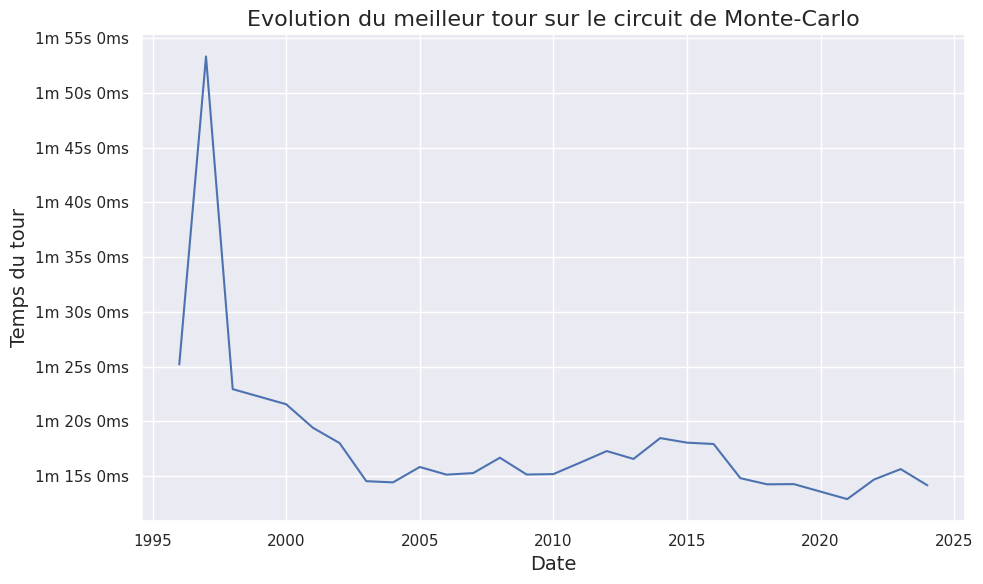

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def human_readable_formatter(x,pos):
    return convert_to_human_readable(int(x))

plt.figure(figsize=(10, 6))
sns.lineplot(data=res,x = "year", y="best_lap")
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_formatter))
plt.title(f"Evolution du meilleur tour sur le circuit de {circuit}", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temps du tour", fontsize=14)
plt.tight_layout()


0        Melbourne
1     Kuala Lumpur
2           Sakhir
3         Montmeló
4         Istanbul
          ...     
72        Portimão
73         Mugello
74          Jeddah
75       Al Daayen
76           Miami
Name: location, Length: 77, dtype: object